# Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the dataset
df = pd.read_csv('flats.csv', sep=';')

In [4]:
df

,rooms,location,condition,m2,type,price
0,2.0,suburbs,repaired,50,used,35000
1,1.0,center,repaired,37,used,35000
2,3.0,suburbs,repaired,67,used,65000
3,NaN,suburbs,repaired,21,used,15000
4,1.0,suburbs,repaired,82,NaN,60000
...,...,...,...,...,...,...
212,2.0,center,unrepaireded,65,new,46407
213,3.0,center,unrepaireded,84,new,57678
214,3.0,center,unrepaireded,93,new,63513
215,2.0,center,unrepaireded,72,new,51121


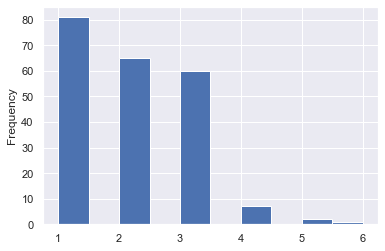

In [58]:
# Feature distribution
df['rooms'].plot(kind = 'hist')

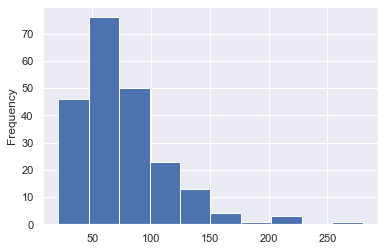

In [59]:
# Feature distribution
df['m2'].plot(kind = 'hist')

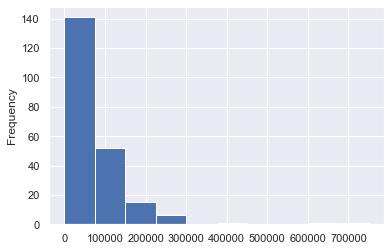

In [60]:
# Feature distribution
df['price'].plot(kind = 'hist')

In [61]:
# Dataset Statistics
df.describe()

,rooms,m2,price
count,216.000000,217.000000,217.000000
mean,2.013889,76.331797,82427.451613
std,0.971593,38.019982,82183.660820
min,1.000000,21.000000,1.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59548.000000
75%,3.000000,91.000000,90000.000000
max,6.000000,280.000000,750000.000000


In [62]:
# Mistakes Deleting 
df = df.drop(df[df.price < 10000].index)
df = df.drop(df[df.price > 300000].index)
df.describe()

,rooms,m2,price
count,212.000000,213.000000,213.000000
mean,1.981132,73.953052,75524.676056
std,0.943736,33.115687,52002.814160
min,1.000000,21.000000,15000.000000
25%,1.000000,49.000000,39429.000000
50%,2.000000,67.000000,59538.000000
75%,3.000000,90.000000,90000.000000
max,6.000000,212.000000,280000.000000


In [63]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
type,1,0.004695
rooms,1,0.004695
price,0,0.000000
m2,0,0.000000
condition,0,0.000000
location,0,0.000000


In [64]:
df.dtypes

rooms        float64
location      object
condition     object
m2             int64
type          object
price          int64
dtype: object

In [65]:
# Function Missing data (numeric)
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var])
    return(x)

In [66]:
# Function Missing data (non-numeric)
def fill_missing_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:        
        prep_fr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_fr.fit(x[char_var])
        x[char_var] = prep_fr.transform(x[char_var])
    return(x)

In [67]:
# Filling NA 
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)
df = fill_missing_char(df)

In [68]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
price,0,0.0
type,0,0.0
m2,0,0.0
condition,0,0.0
location,0,0.0
rooms,0,0.0


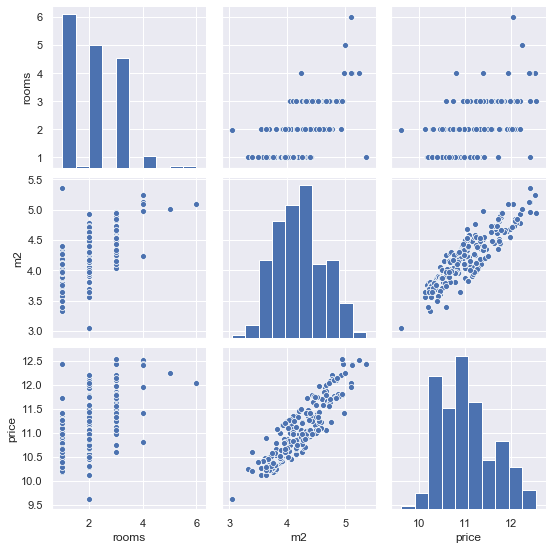

In [69]:
# Log Transformations for Skewed Distributions
df[['m2', 'price']] = np.log(df[['m2', 'price']])
#df.describe()
import seaborn as sns
sns.set()
sns.pairplot(df)

In [70]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [71]:
# Outliers
df = outliers(df)
df.describe()

,rooms,m2,price
count,213.000000,213.000000,213.000000
mean,1.974612,4.213593,11.045684
std,0.917869,0.419977,0.590462
min,1.000000,3.044522,9.615805
25%,1.000000,3.891820,10.582257
50%,2.000000,4.204693,10.994370
75%,3.000000,4.499810,11.407565
max,4.805655,5.356586,12.542545


In [72]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [73]:
# Encoding categorical data
df = encoding_char(df)

In [74]:
df

,rooms,location,condition,m2,type,price
0,2.000000,0,0,3.912023,0,10.463103
1,1.000000,1,0,3.610918,0,10.463103
2,3.000000,0,0,4.204693,0,11.082143
3,1.981132,0,0,3.044522,0,9.615805
4,1.000000,0,0,4.406719,1,11.002100
...,...,...,...,...,...,...
212,2.000000,1,1,4.174387,1,10.745206
213,3.000000,1,1,4.430817,1,10.962631
214,3.000000,1,1,4.532599,1,11.059000
215,2.000000,1,1,4.276666,1,10.841951


In [75]:
# Descriptive Statistics
df.describe()

,rooms,location,condition,m2,type,price
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.974612,0.727700,0.784038,4.213593,0.798122,11.045684
std,0.917869,0.446192,0.412458,0.419977,0.402347,0.590462
min,1.000000,0.000000,0.000000,3.044522,0.000000,9.615805
25%,1.000000,0.000000,1.000000,3.891820,1.000000,10.582257
50%,2.000000,1.000000,1.000000,4.204693,1.000000,10.994370
75%,3.000000,1.000000,1.000000,4.499810,1.000000,11.407565
max,4.805655,1.000000,1.000000,5.356586,1.000000,12.542545


In [76]:
# Exporting the dataset
df.to_csv('flats_prep.csv', sep=';', index=False)

In [77]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))